<a href="https://colab.research.google.com/github/Parthsarthi-lab/Machine-Learning-Projects/blob/main/Zinc_Prices_TS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime as dt

from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/PYTHON/Demo_Datasets.zip (Unzipped Files)/Demo Datasets/Lesson 8/zinc_prices_IMF.csv")
df.head()

,Date,Price
0,1-Jan-80,773.82
1,1-Feb-80,868.62
2,1-Mar-80,740.75
3,1-Apr-80,707.68
4,1-May-80,701.07


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Price
0,1980-01-01,773.82
1,1980-02-01,868.62
2,1980-03-01,740.75
3,1980-04-01,707.68
4,1980-05-01,701.07
...,...,...
429,2015-10-01,1724.34
430,2015-11-01,1583.31
431,2015-12-01,1527.79
432,2016-01-01,1520.36


In [ ]:
df = df.set_index("Date")
df

,Price
Date,
1980-01-01,773.82
1980-02-01,868.62
1980-03-01,740.75
1980-04-01,707.68
1980-05-01,701.07
...,...
2015-10-01,1724.34
2015-11-01,1583.31
2015-12-01,1527.79


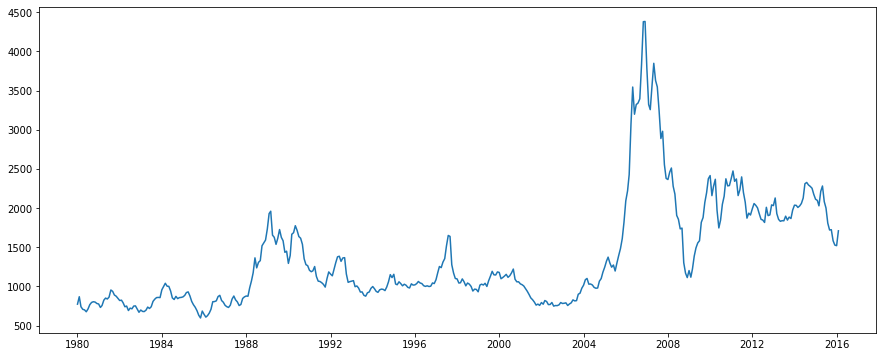

In [ ]:
ts = df['Price']
plt.plot(ts)  # CYCLIC DATA

In [ ]:
sum(np.unique(ts,return_counts=True)[1])

434

In [ ]:
def test_stationarity(timeseries):
  rolmean = timeseries.rolling(window=52,center=False).mean()
  rolstd = timeseries.rolling(window=52,center=False).std()

  org = plt.plot(timeseries,color="blue",label='Orignal')
  mean = plt.plot(rolmean,color="red",label="Rolling Mean")
  std = plt.plot(rolstd,color="black",label="Rolling STD")
  plt.legend(loc="best")
  plt.title("Rolling means and Standard deviation")
  plt.show(block=False)


  print("DICKY-FULLER TEST :")
  dftest = adfuller(timeseries,autolag="AIC")
  dfoutput = pd.Series(dftest[0:4],index=["Test Statistic","p-values","#Lags Used","No. of observations used"])

  for key,value in dftest[4].items():
    dfoutput["Critical Value(%s)"%key] = value
  print(dfoutput)

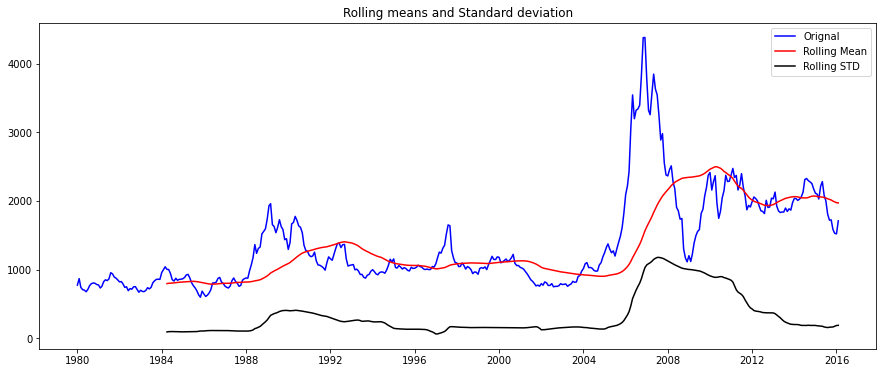

DICKY-FULLER TEST :
Test Statistic               -3.139601
p-values                      0.023758
#Lags Used                    7.000000
No. of observations used    426.000000
Critical Value(1%)           -3.445794
Critical Value(5%)           -2.868349
Critical Value(10%)          -2.570397
dtype: float64


In [ ]:
test_stationarity(ts)

Data is stationary

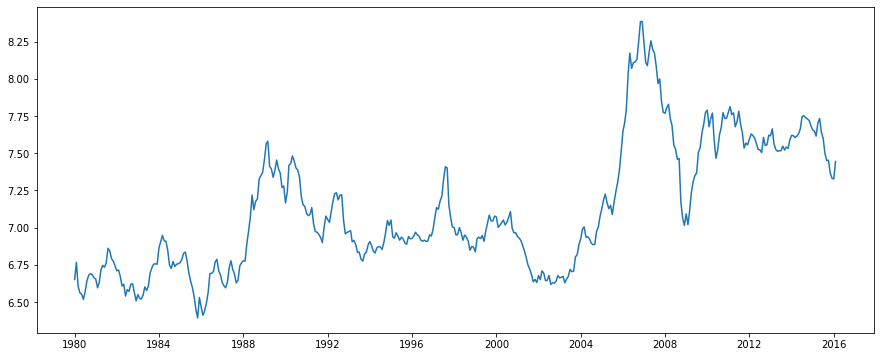

In [ ]:
# Doing log transformation
ts_log = np.log(ts)
plt.plot(ts_log)

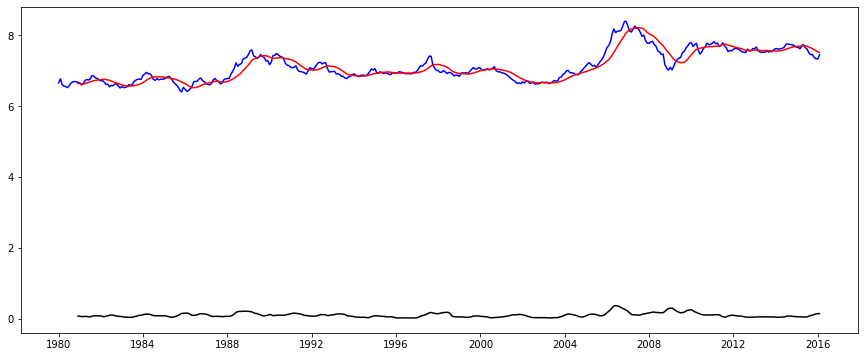

In [ ]:
movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()

plt.plot(ts_log,color="blue",label="Orignal")
plt.plot(movingAverage,color="red",label="Rolling mean")
plt.plot(movingSTD,color="black",label="Rolling STD")
plt.show()

In [ ]:
# DIFFERENCING TO REMOVE STATIONARITY
ts_log_mv_diff = ts_log-movingAverage
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(13)

Date
1980-12-01    0.030472
1981-01-01    0.021753
1981-02-01   -0.022485
1981-03-01    0.008392
1981-04-01    0.082191
1981-05-01    0.097617
1981-06-01    0.066587
1981-07-01    0.078914
1981-08-01    0.160180
1981-09-01    0.127928
1981-10-01    0.068802
1981-11-01    0.043854
1981-12-01    0.006407
Name: Price, dtype: float64

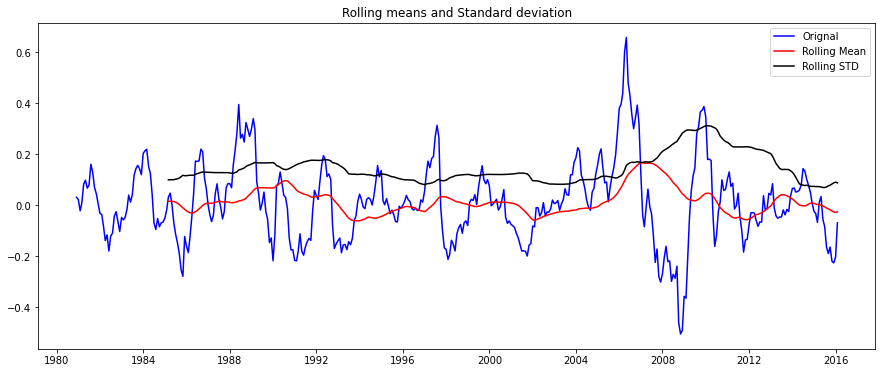

DICKY-FULLER TEST :
Test Statistic             -5.898484e+00
p-values                    2.814411e-07
#Lags Used                  4.000000e+00
No. of observations used    4.180000e+02
Critical Value(1%)         -3.446091e+00
Critical Value(5%)         -2.868479e+00
Critical Value(10%)        -2.570466e+00
dtype: float64


In [ ]:
test_stationarity(ts_log_mv_diff)

STATIONARITY REMOVED

## BUILDING ARIMA MODEL

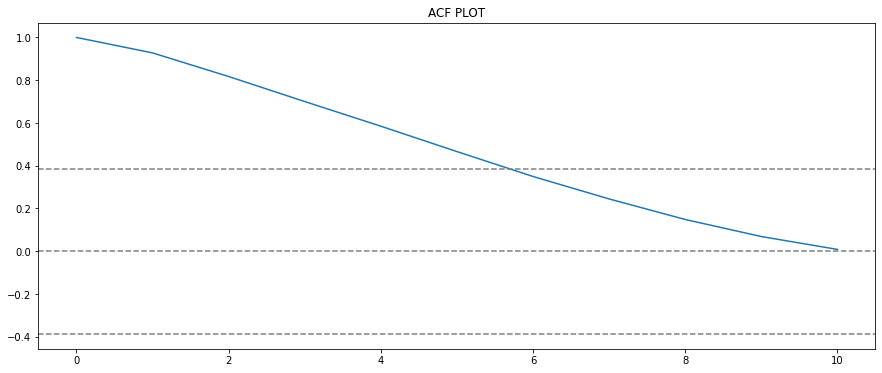

In [ ]:
# Autocorrelation plot gives the order of the MA model(q)
plt.plot(np.arange(0,11),acf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle="--",color='gray')
plt.title("ACF PLOT")
plt.show()

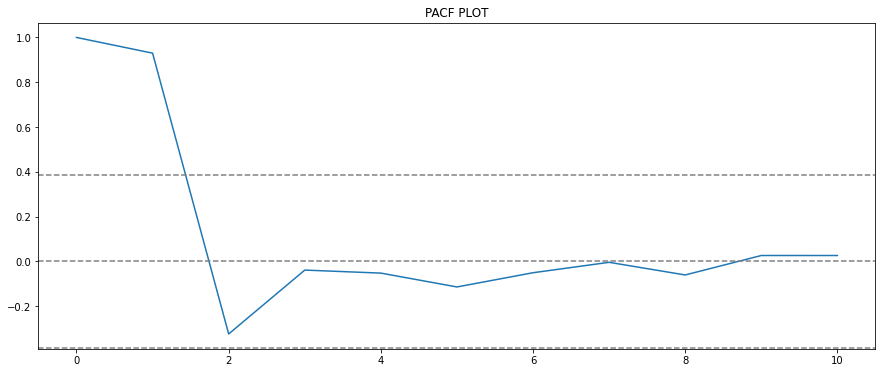

In [ ]:
# Autocorrelation plot gives the order of the MA model(q)
plt.plot(np.arange(0,11),pacf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle="--",color='gray')
plt.title("PACF PLOT")
plt.show()

Text(0.5, 1.0, 'RSS:  nan')

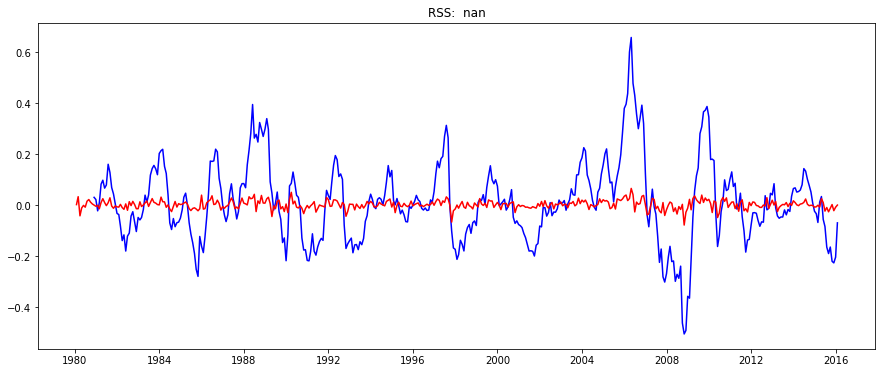

In [ ]:
model = ARIMA(ts_log,order=(1,1,0))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_mv_diff,color="blue")
plt.plot(results_ARIMA.fittedvalues,color="red")
plt.title("RSS: %4.f"%sum((results_ARIMA.fittedvalues[1:]-ts_log_mv_diff)**2))

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diff.head()

Date
1980-02-01    0.002030
1980-03-01    0.033049
1980-04-01   -0.042031
1980-05-01   -0.011002
1980-06-01   -0.001089
dtype: float64

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
1980-02-01    0.002030
1980-03-01    0.035079
1980-04-01   -0.006952
1980-05-01   -0.017955
1980-06-01   -0.019043
dtype: float64

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1980-01-01    6.651339
1980-02-01    6.653369
1980-03-01    6.686418
1980-04-01    6.644387
1980-05-01    6.633384
dtype: float64

Text(0.5, 1.0, 'RMSE: 1515')

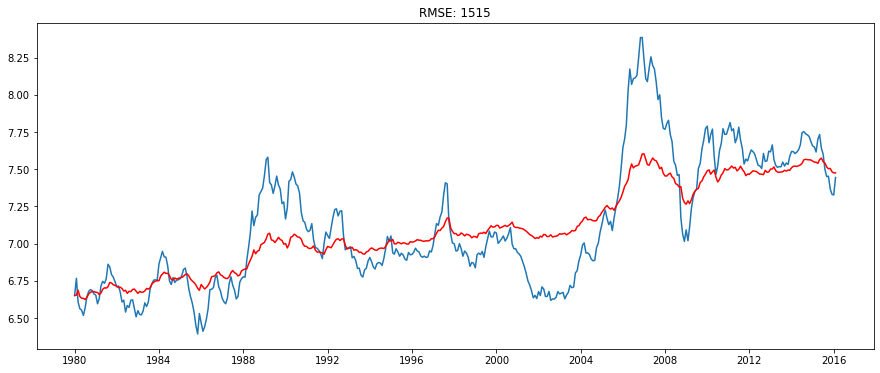

In [ ]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log,color="red")
plt.title("RMSE: %4.f"%np.sqrt(sum((predictions_ARIMA_log-ts)**2)/len(ts)))

Text(0.5, 1.0, 'RMSE:  429')

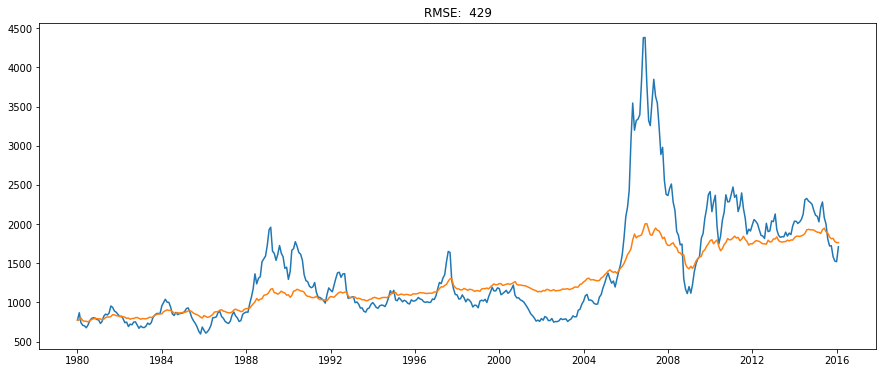

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log) # Converting from log scale to orignal scale
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title("RMSE: %4.f"%np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))